In [255]:
# Read and drop null values
data = pd.read_csv('/content/Reasons1.csv')
data.head(2)

,Username,Batch,Reasons
0,kaushal.comp@gmail.com,Aug-24,Arranging fund problem/ not able to get the ed...
1,aniketrudraksh2002@gmail.com,Aug-24,.


In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  643 non-null    object
 1   Batch     643 non-null    object
 2   Reasons   594 non-null    object
dtypes: object(3)
memory usage: 15.2+ KB


In [258]:
data.columns

Index(['Username', 'Batch', 'Reasons'], dtype='object')

In [259]:
# Define a text preprocessing function
def preprocess_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove special characters and numbers
    tokens = word_tokenize(text)                              # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
# Replace 'Feedback' with the name of your text column in the CSV
data['Cleaned_Feedback'] = data['Reasons'].apply(preprocess_text)

# Display the cleaned feedback
print(data[['Reasons', 'Cleaned_Feedback']].head())

                                             Reasons  \
0  Arranging fund problem/ not able to get the ed...   
1                                                  .   
2                         I got a call from Infosys    
3                                                 No   
4  Due to low funds. I didn't able to taks admiss...   

                                 Cleaned_Feedback  
0  arranging fund problem able get education loan  
1                                                  
2                                got call infosys  
3                                                  
4          due low fund didnt able taks admission  


In [260]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Feedback'].apply(get_sentiment)

# Display sentiment distribution
print(data['Sentiment'].value_counts())

Sentiment
Neutral     340
Positive    163
Negative    140
Name: count, dtype: int64


<ipython-input-261-b10891ae357f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


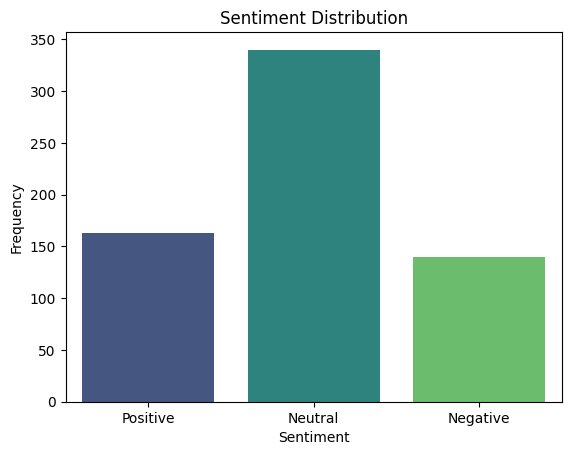

In [261]:

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

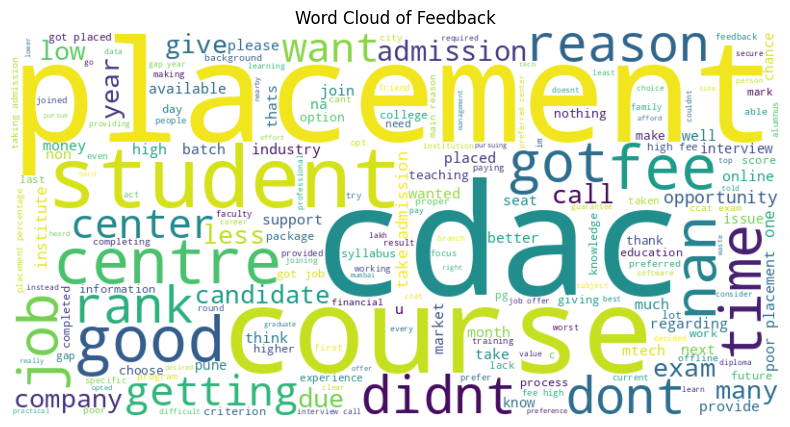

In [262]:


# Generate word cloud
all_words = ' '.join(data['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback')
plt.show()

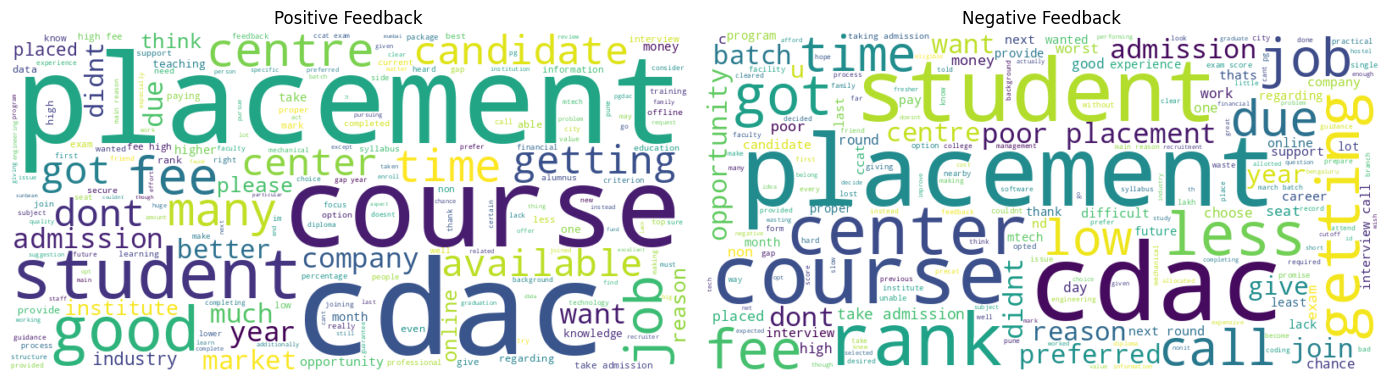

In [263]:
# Generate word clouds for positive and negative feedback
positive_words = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Feedback'])
negative_words = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_words), interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Feedback')

axes[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_words), interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

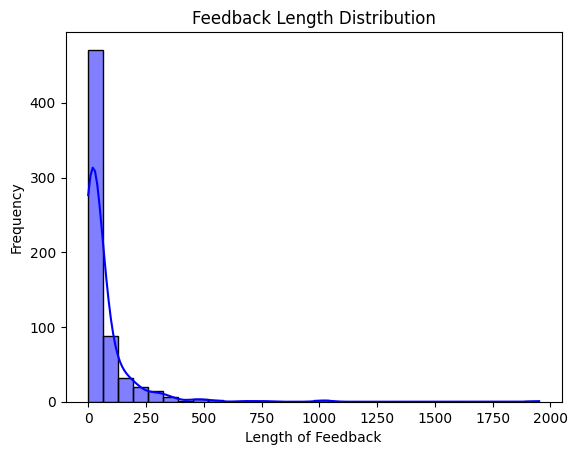

In [264]:
# Add a feedback length column
data['Feedback_Length'] = data['Cleaned_Feedback'].str.len()

# Plot feedback length distribution
sns.histplot(data['Feedback_Length'], kde=True, color='blue', bins=30)
plt.title('Feedback Length Distribution')
plt.xlabel('Length of Feedback')
plt.ylabel('Frequency')
plt.show()

<ipython-input-265-9dae8a5b7b96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')


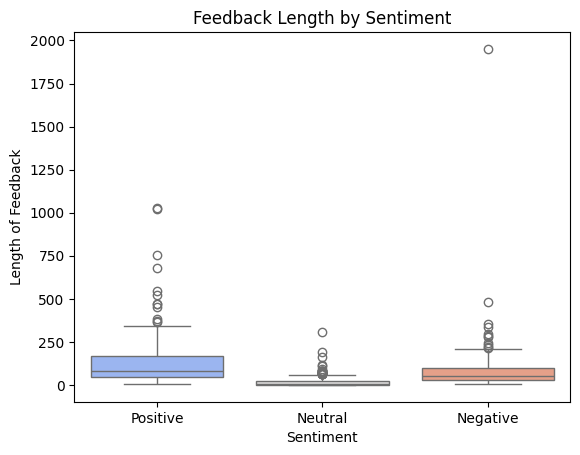

In [265]:

# Compare feedback length by sentiment
sns.boxplot(x='Sentiment', y='Feedback_Length', data=data, palette='coolwarm')
plt.title('Feedback Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Feedback')
plt.show()

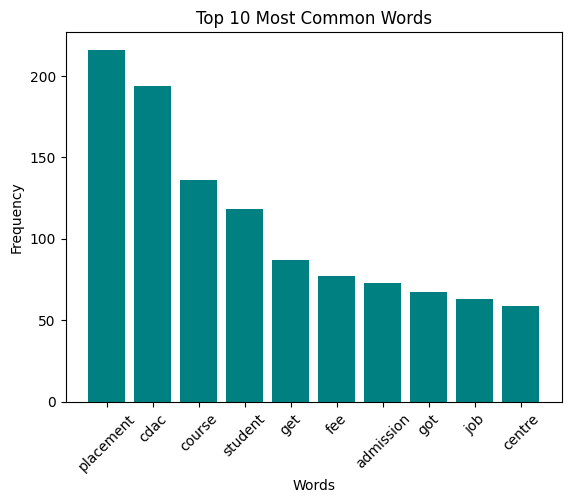

In [266]:

# Get most common words
word_list = all_words.split()
word_counts = Counter(word_list)
common_words = word_counts.most_common(10)

# Plot top words
words, counts = zip(*common_words)
plt.bar(words, counts, color='teal')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()